# Project Description
Used Cars Price Prediction and Evaluation(Car_price.csv)

- Draw important conclusion from the data (eg. priceUSD vs Mileage or year andsegment vs price):

    - Use of proper function like groupby, to draw decisive factors from the data
    
    - Show plots to show trends in data
    
    
- Statistical analysis of data using p values to draw important conclusions is appreciated (eg. T-test or Chi Square Test)


- Create a model to predict the priceUSD columns.

    - Show how you are doing data cleaning and Encoding the data.

    - Use of function over redundant codes for everything is important.

# Importing Libraries

In [1]:
import numpy as np ### numpy for array operations
import pandas as pd ### pandas library for data manipulation
import matplotlib.pyplot as plt ### matplotlib for data visualisation 
import sklearn
import seaborn as sns ### seaborn for plotting graphs 

## Importing the Dataset

In [2]:
#Read fiales:
## Importing the CAR PRICE dataset 
df = pd.read_csv(r'cars_price.csv')

In [3]:
## Displaying the first 5 records of the dataset
df.head()

,Unnamed: 0,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


In [4]:
### Displaying the last 5 records of the dataset 
df.tail()

,Unnamed: 0,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
39995,39995,jeep,grand-cherokee,12500,2008,with mileage,214000.0,petrol,3700.0,silver,auto,all-wheel drive,J
39996,39996,peugeot,607,4754,2001,with mileage,295000.0,petrol,2200.0,blue,mechanics,front-wheel drive,E
39997,39997,mercedes-benz,c-klass,4000,1999,with mileage,0.0,diesel,2200.0,other,mechanics,rear drive,D
39998,39998,proton,persona,1200,1996,with mileage,250000.0,petrol,1300.0,other,mechanics,front-wheel drive,NaN
39999,39999,mercedes-benz,190-w201,744,1986,with mileage,272344.0,diesel,1997.0,silver,mechanics,rear drive,D


In [5]:
### Printing the Shape of the dataset (row, column)
df.shape

(40000, 13)

In [6]:
### Describing and gaining information about the dataset
## Dataset distribution, percentile, minimum and maximum values
df.describe()

,Unnamed: 0,priceUSD,year,mileage(kilometers),volume(cm3)
count,40000.00000,40000.000000,40000.000000,4.000000e+04,39970.000000
mean,19999.50000,7430.383775,2003.485625,2.434332e+05,2103.201676
std,11547.14972,8338.242134,8.114896,3.167033e+05,938.724653
min,0.00000,95.000000,1938.000000,0.000000e+00,500.000000
25%,9999.75000,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,19999.50000,5350.000000,2004.000000,2.280000e+05,1995.000000
75%,29999.25000,9850.000000,2010.000000,3.087610e+05,2300.000000
max,39999.00000,195000.000000,2019.000000,9.999999e+06,20000.000000


In [7]:
# Displaying the name of the columns of the dataset
df.columns

Index(['Unnamed: 0', 'make', 'model', 'priceUSD', 'year', 'condition',
       'mileage(kilometers)', 'fuel_type', 'volume(cm3)', 'color',
       'transmission', 'drive_unit', 'segment'],
      dtype='object')

# Exploratory Data Analysis

In [8]:
### Getting the information the dataset 
# column names and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
Unnamed: 0             40000 non-null int64
make                   40000 non-null object
model                  40000 non-null object
priceUSD               40000 non-null int64
year                   40000 non-null int64
condition              40000 non-null object
mileage(kilometers)    40000 non-null float64
fuel_type              40000 non-null object
volume(cm3)            39970 non-null float64
color                  40000 non-null object
transmission           40000 non-null object
drive_unit             38655 non-null object
segment                36245 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 4.0+ MB


In [9]:
# Finding out the missing values for all the columns
df.isnull().sum()

Unnamed: 0                0
make                      0
model                     0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              30
color                     0
transmission              0
drive_unit             1345
segment                3755
dtype: int64

In [10]:
# Displaying the Unique data for each column
df.nunique()

Unnamed: 0             40000
make                      93
model                    991
priceUSD                2510
year                      72
condition                  3
mileage(kilometers)     6392
fuel_type                  3
volume(cm3)              396
color                     13
transmission               2
drive_unit                 4
segment                    9
dtype: int64

In [11]:
#### Dropping the less important feature
df = df.drop(['Unnamed: 0'],axis = 1)
df

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D
...,...,...,...,...,...,...,...,...,...,...,...,...
39995,jeep,grand-cherokee,12500,2008,with mileage,214000.0,petrol,3700.0,silver,auto,all-wheel drive,J
39996,peugeot,607,4754,2001,with mileage,295000.0,petrol,2200.0,blue,mechanics,front-wheel drive,E
39997,mercedes-benz,c-klass,4000,1999,with mileage,0.0,diesel,2200.0,other,mechanics,rear drive,D
39998,proton,persona,1200,1996,with mileage,250000.0,petrol,1300.0,other,mechanics,front-wheel drive,NaN


# Evaluating the Categorical Features

Frequency of Categories for varible make
volkswagen        4943
audi              2849
bmw               2839
opel              2662
renault           2650
                  ... 
shanghai-maple       1
saipa                1
byd                  1
mclaren              1
bogdan               1
Name: make, Length: 93, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92]),
 [Text(0, 0, 'honda'),
  Text(1, 0, 'ford'),
  Text(2, 0, 'nissan'),
  Text(3, 0, 'volkswagen'),
  Text(4, 0, 'mitsubishi'),
  Text(5, 0, 'renault'),
  Text(6, 0, 'audi'),
  Text(7, 0, 'daewoo'),
  Text(8, 0, 'toyota'),
  Text(9, 0, 'opel'),
  Text(10, 0, 'chevrolet'),
  Text(11, 0, 'mercedes-benz'),
  Text(12, 0, 'lexus'),
  Text(13, 0, 'bmw'),
  Text(14, 0, 'gaz'),
  Text(15, 0, 'volvo'),
  Text(16, 0, 'jaguar'),
  Text(17, 0, 'suzuki'),
  Text(18, 0, 'lada-vaz'),
  Text(19, 0, 'hyundai'),
  Text(20, 0, 'citroen'),
  Text(21, 0, 'alfa-romeo'),
  Text(22, 0, 'mazda'),
  

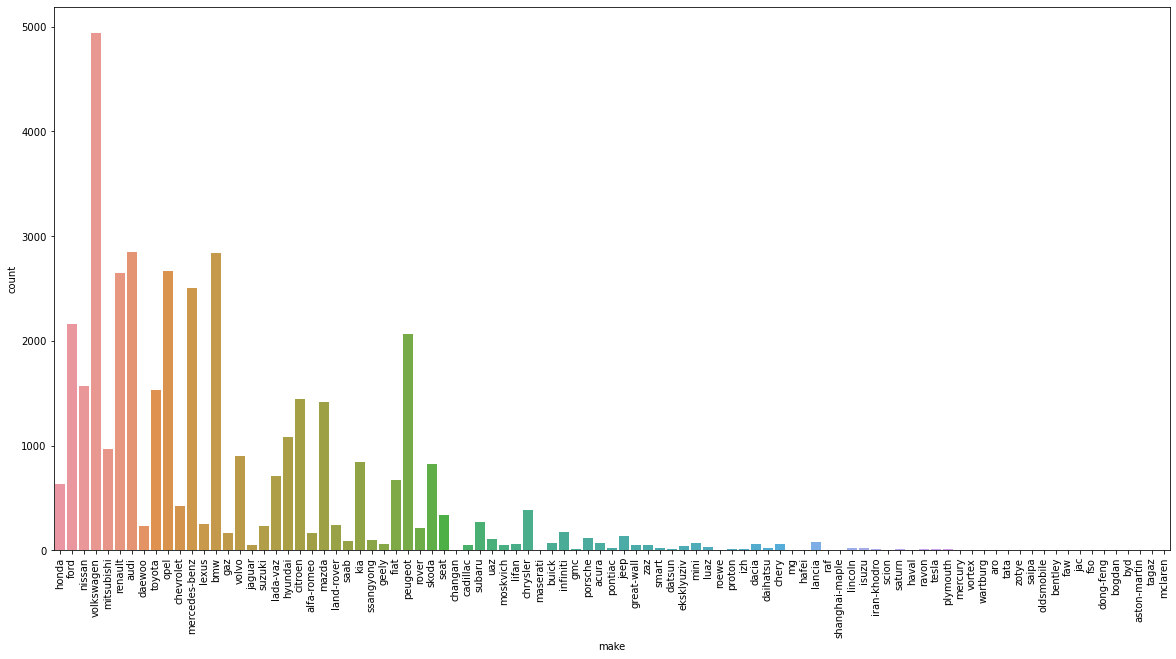

In [12]:
print('Frequency of Categories for varible make')
make_counts = df['make'].value_counts()
print(make_counts)
plt.figure(figsize=(20,10))
sns.countplot(df.make)
plt.xticks(rotation=90)

In [13]:
### Frequency of Categories for varible model using value_counts functionn
print('Frequency of Categories for varible model')
df['model'].value_counts()

Frequency of Categories for varible model


passat          1532
5-seriya        1003
a6               896
golf             783
astra            698
                ... 
citigo             1
mystique           1
bx                 1
gran-turismo       1
simbo              1
Name: model, Length: 991, dtype: int64

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

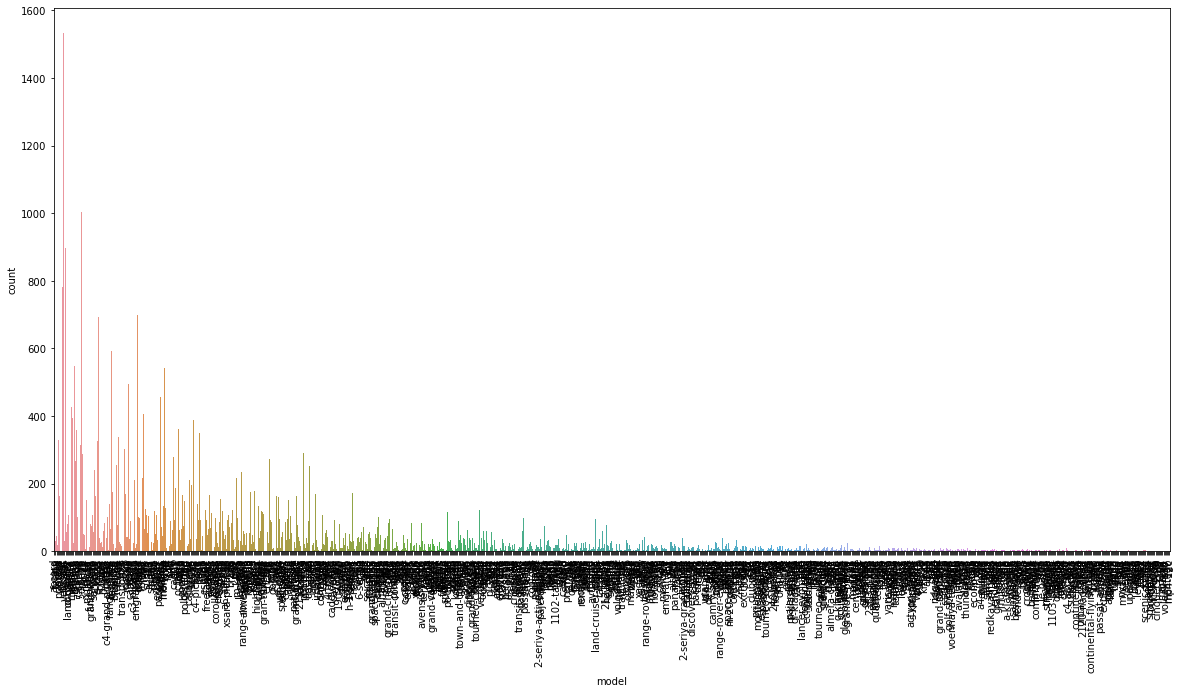

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(df.model)
plt.xticks(rotation=90)

In [15]:
### Frequency of Categories for varible year using value_counts functionn
print('Frequency of Categories for varible year')
df['year'].value_counts()

Frequency of Categories for varible year


2008    2264
1998    1993
2007    1909
2001    1881
1999    1880
        ... 
1938       1
1971       1
1945       1
1949       1
1951       1
Name: year, Length: 72, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71]),
 [Text(0, 0, '1938'),
  Text(1, 0, '1945'),
  Text(2, 0, '1949'),
  Text(3, 0, '1950'),
  Text(4, 0, '1951'),
  Text(5, 0, '1952'),
  Text(6, 0, '1954'),
  Text(7, 0, '1955'),
  Text(8, 0, '1956'),
  Text(9, 0, '1957'),
  Text(10, 0, '1958'),
  Text(11, 0, '1959'),
  Text(12, 0, '1960'),
  Text(13, 0, '1961'),
  Text(14, 0, '1962'),
  Text(15, 0, '1963'),
  Text(16, 0, '1964'),
  Text(17, 0, '1965'),
  Text(18, 0, '1966'),
  Text(19, 0, '1967'),
  Text(20, 0, '1968'),
  Text(21, 0, '1969'),
  Text(22, 0, '1970'),
  Text(23, 0, '1971'),
  Text(24, 0, '1972'),
  Text(25, 0, '1973'),
  Text(26, 0, '1974'),
  Text(27, 0, '1975'),
  Text(28, 0, '1976'),
  Text(29, 0,

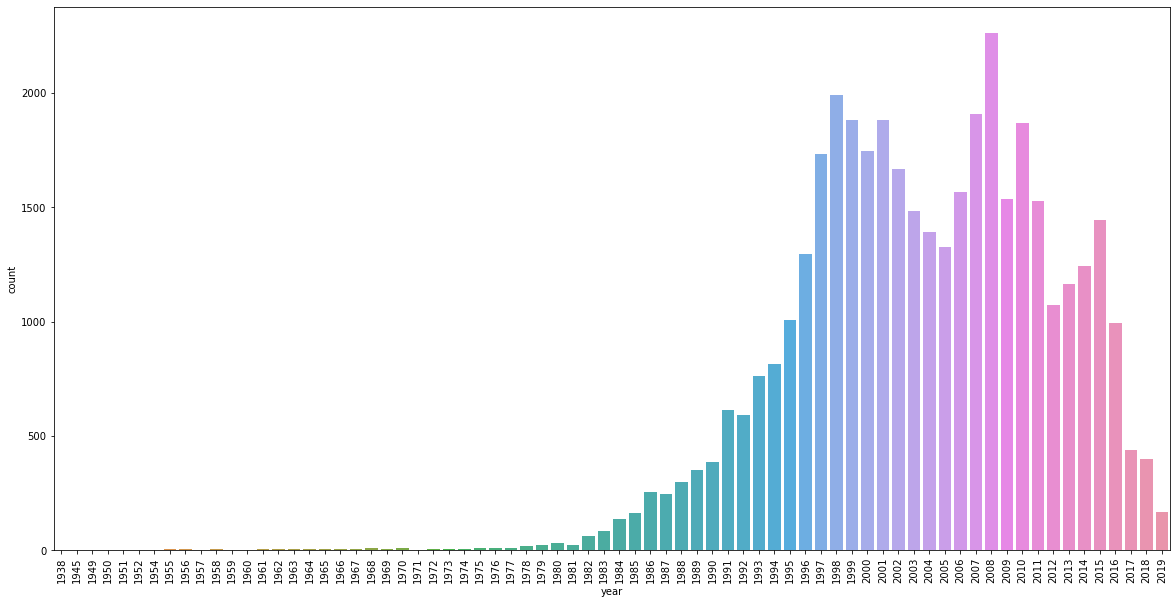

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(df.year)
plt.xticks(rotation=90)

In [17]:
### Frequency relation of model and year
df.groupby(["year","model"]).size().head(40)

year  model           
1938  retro               1
1945  voennaya-tehnika    1
1949  m-20-pobeda         1
1950  m-20-pobeda         2
1951  67                  1
1952  401                 2
      67                  1
1954  69                  2
1955  401                 1
      402                 1
      m-20-pobeda         2
1956  402                 1
      69                  2
      m-20-pobeda         1
1957  21                  1
      69                  1
      m-20-pobeda         1
1958  21                  2
      410                 1
      69                  1
1959  21                  1
      69                  1
1960  21                  2
1961  21                  2
      407                 2
1962  21                  1
      401                 1
      407                 1
      69                  3
      965                 1
1963  21                  4
      407                 2
1964  21                  3
      403                 1
      69                 

Frequency of Categories for varible transmission
mechanics    25630
auto         14370
Name: transmission, dtype: int64


<AxesSubplot:xlabel='transmission', ylabel='count'>

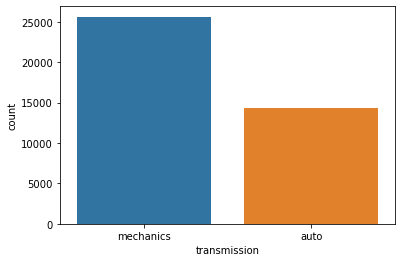

In [18]:
# The value counts for the transmission 
print('Frequency of Categories for varible transmission')
print(df['transmission'].value_counts())
sns.countplot(df.transmission)

Frequency of Categories for varible condition
with mileage    39337
with damage       341
for parts         322
Name: condition, dtype: int64


<AxesSubplot:xlabel='condition', ylabel='count'>

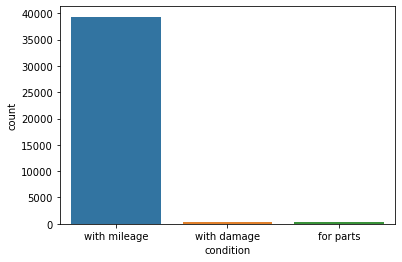

In [19]:
# The value counts for the condition feature 
print('Frequency of Categories for varible condition')
print(df['condition'].value_counts())
sns.countplot(df.condition)

Frequency of Categories for varible fuel_type
petrol        25869
diesel        14101
electrocar       30
Name: fuel_type, dtype: int64


<AxesSubplot:xlabel='fuel_type', ylabel='count'>

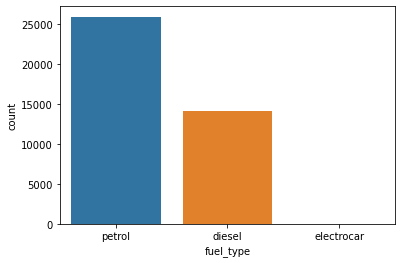

In [20]:
# The value counts for the fuel_type feature 
print('Frequency of Categories for varible fuel_type')
print(df['fuel_type'].value_counts())
sns.countplot(df.fuel_type)

Frequency of Categories for varible segment
D    8985
C    7509
J    6161
M    4532
E    4391
B    3128
F     658
S     549
A     332
Name: segment, dtype: int64
-------------------------------------------------------------------------------------------


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'D'),
  Text(1, 0, 'M'),
  Text(2, 0, 'A'),
  Text(3, 0, 'J'),
  Text(4, 0, 'C'),
  Text(5, 0, 'E'),
  Text(6, 0, 'F'),
  Text(7, 0, 'B'),
  Text(8, 0, 'S')])

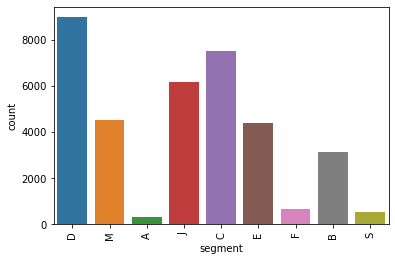

In [21]:
# The value counts for the segment feature 
print('Frequency of Categories for varible segment')
print(df['segment'].value_counts())
print("-------------------------------------------------------------------------------------------")
sns.countplot(df.segment)
plt.xticks(rotation=90)

In [22]:
### Using groupby to evaluate the dependence and relation between fuel_type and condition
df.groupby(["fuel_type","condition"]).size()

fuel_type   condition   
diesel      for parts          73
            with damage        81
            with mileage    13947
electrocar  with mileage       30
petrol      for parts         249
            with damage       260
            with mileage    25360
dtype: int64

In [23]:
### Using groupby to evaluate the dependence and relation between segment and condition
df.groupby(["condition","segment"]).size()

condition     segment
for parts     A             4
              B            34
              C           110
              D            91
              E            31
              J             4
              M             8
              S             2
with damage   B            31
              C            84
              D            81
              E            36
              F             8
              J            26
              M            18
              S             5
with mileage  A           328
              B          3063
              C          7315
              D          8813
              E          4324
              F           650
              J          6131
              M          4506
              S           542
dtype: int64

Frequency of Categories for varible drive_unit
front-wheel drive             27074
rear drive                     4809
all-wheel drive                4176
part-time four-wheel drive     2596
Name: drive_unit, dtype: int64
-------------------------------------------------------------------------------------------


(array([0, 1, 2, 3]),
 [Text(0, 0, 'front-wheel drive'),
  Text(1, 0, 'all-wheel drive'),
  Text(2, 0, 'part-time four-wheel drive'),
  Text(3, 0, 'rear drive')])

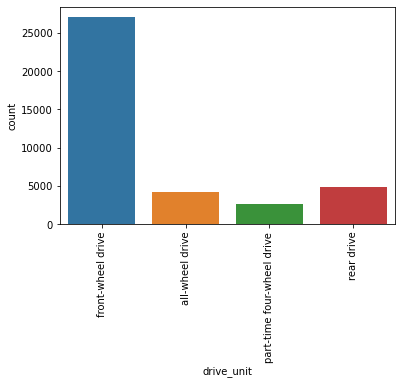

In [24]:
# The value counts for the drive_unit feature 
print('Frequency of Categories for varible drive_unit')
print(df['drive_unit'].value_counts())
print("-------------------------------------------------------------------------------------------")
sns.countplot(df.drive_unit)
plt.xticks(rotation=90)

In [25]:
### Using groupby to evaluate the dependence and relation between drive_unit and condition
df.groupby(["drive_unit","condition"]).size()

drive_unit                  condition   
all-wheel drive             for parts           4
                            with damage        20
                            with mileage     4152
front-wheel drive           for parts         239
                            with damage       233
                            with mileage    26602
part-time four-wheel drive  for parts           4
                            with damage        20
                            with mileage     2572
rear drive                  for parts          46
                            with damage        43
                            with mileage     4720
dtype: int64

Frequency of Categories for varible color
black       8867
silver      7140
blue        5705
gray        4161
white       3774
green       2778
other       2367
red         1985
burgundy    1458
brown        947
purple       437
yellow       219
orange       162
Name: color, dtype: int64
-------------------------------------------------------------------------------------------


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'black'),
  Text(1, 0, 'silver'),
  Text(2, 0, 'purple'),
  Text(3, 0, 'blue'),
  Text(4, 0, 'burgundy'),
  Text(5, 0, 'green'),
  Text(6, 0, 'gray'),
  Text(7, 0, 'white'),
  Text(8, 0, 'other'),
  Text(9, 0, 'red'),
  Text(10, 0, 'brown'),
  Text(11, 0, 'orange'),
  Text(12, 0, 'yellow')])

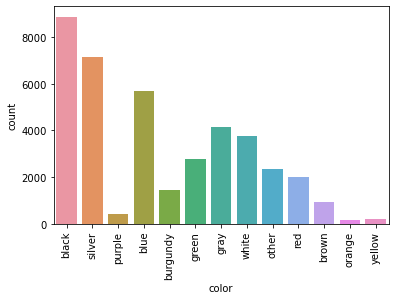

In [26]:
# The value counts for the color feature 
print('Frequency of Categories for varible color')
print(df['color'].value_counts())
print("-------------------------------------------------------------------------------------------")
sns.countplot(df.color)
plt.xticks(rotation=90)

In [27]:
### Using groupby to evaluate the dependence and relation between year and segment
df.groupby(["year","segment"]).size()

year  segment
1957  E           1
1958  E           2
1959  E           1
1960  E           2
1961  E           2
                 ..
2019  D          16
      E           9
      J          52
      M           4
      S           2
Length: 377, dtype: int64

# Visualizing the Relationship between Features and Response

<AxesSubplot:xlabel='priceUSD'>

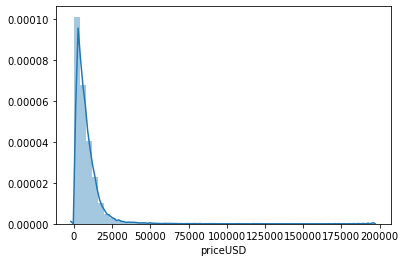

In [28]:
### Distribution plot of priceUSD(target variable)
sns.distplot(a = df['priceUSD'])

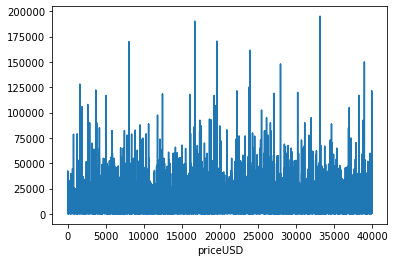

In [29]:
#This is a line plot to show the variation of the target variable across the dataset
import seaborn as sns
sns.lineplot(data = df['priceUSD'])
plt.xlabel('priceUSD')
plt.show()

<AxesSubplot:>

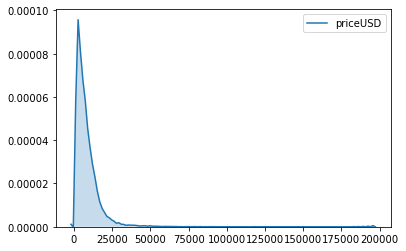

In [30]:
sns.kdeplot(data = df['priceUSD'], shade = True)

## Skewness and Kurtosis of the target varible


In [31]:
# Skewness and Kurtosis of the target varible
print ("Skew is:", df.priceUSD.skew())
print("Kurtosis: %f" % df.priceUSD.kurt())

Skew is: 5.01181044013898
Kurtosis: 53.877239


<AxesSubplot:>

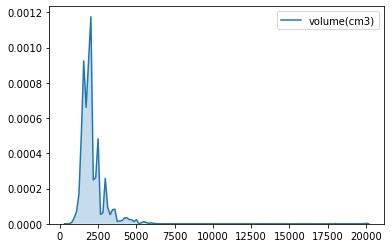

In [32]:
sns.kdeplot(data = df['volume(cm3)'], shade = True)

<AxesSubplot:>

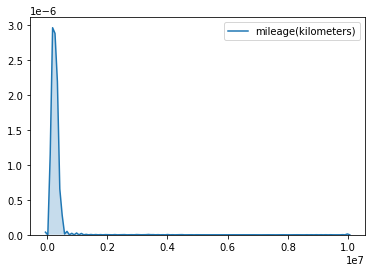

In [33]:
sns.kdeplot(data = df['mileage(kilometers)'], shade = True)

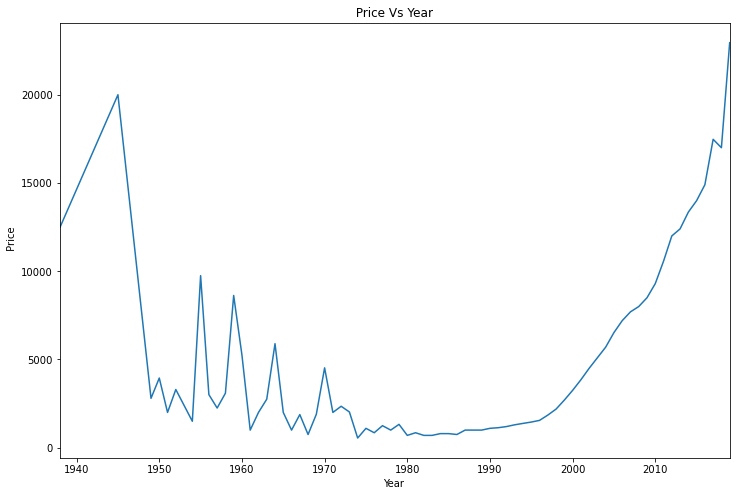

In [34]:
# grouping Year with priceUSD
df.groupby("year")["priceUSD"].median().plot(figsize = (12, 8))
plt.xlabel("Year ")
plt.ylabel(" Price")
plt.title(" Price Vs Year ")
plt.show()

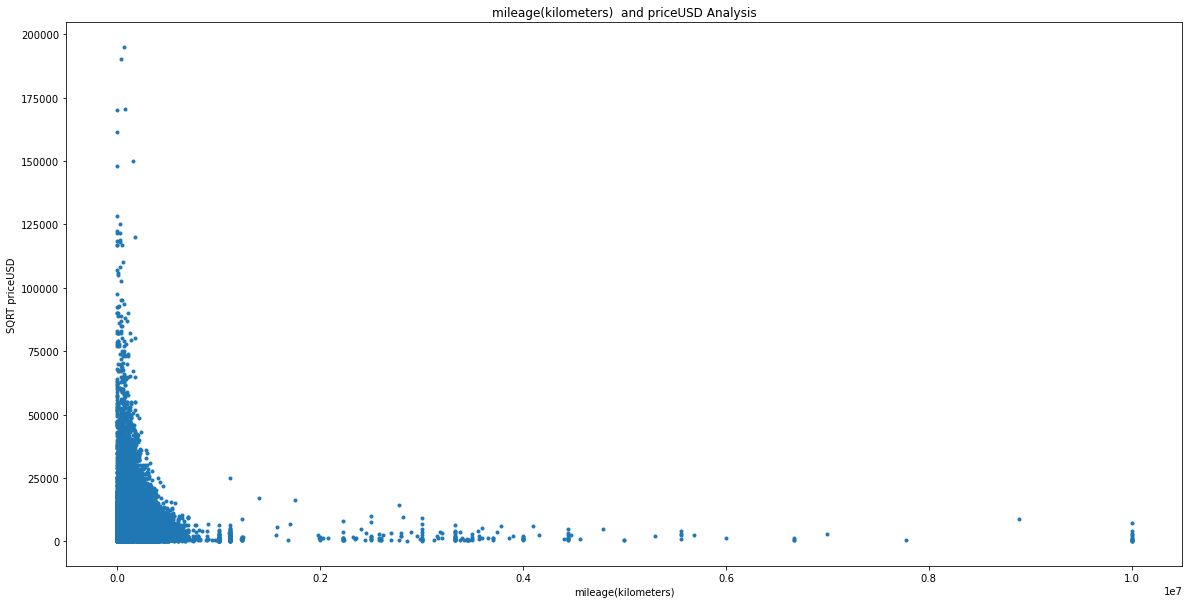

In [35]:
### Scatter plot of mileage(kilometers)  and priceUSD
plt.figure(figsize = (20,10))
plt.xlabel("mileage(kilometers)")
plt.ylabel("SQRT priceUSD")
plt.title("mileage(kilometers)  and priceUSD Analysis")
plt.plot(df['mileage(kilometers)'] , df["priceUSD"],'.', alpha = 1)

### Using pivot table for Feature Analysis

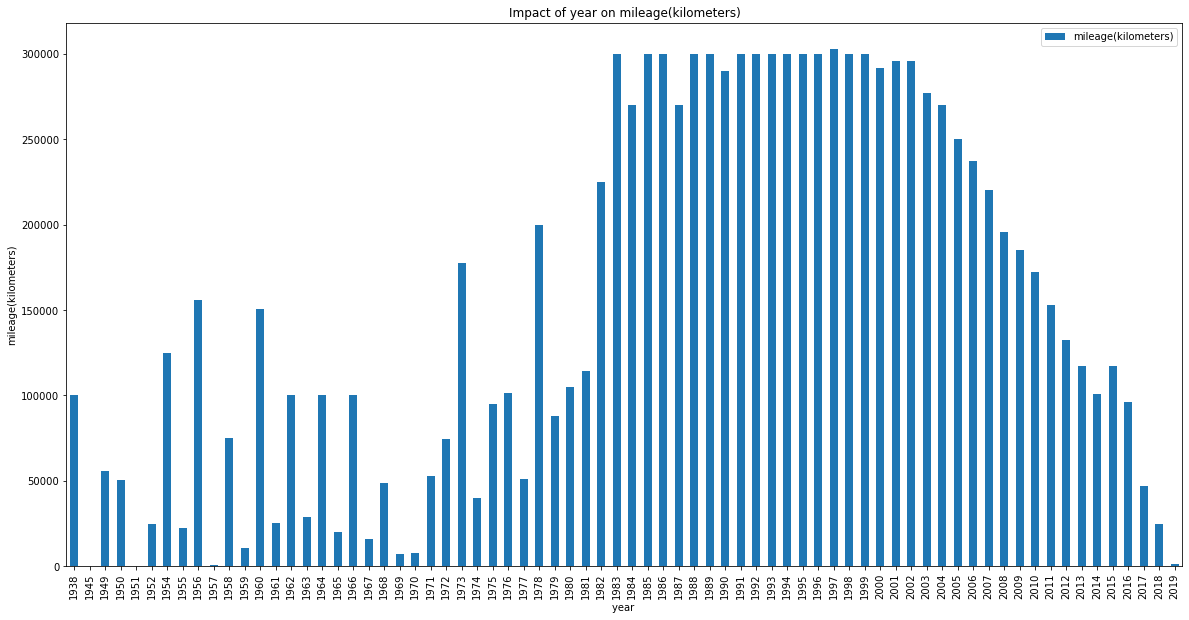

In [36]:
### plotting bar graph between year and mileage(Kilomenters)
df.pivot_table(index='year', values="mileage(kilometers)", aggfunc=np.median).plot(kind='bar',figsize=(20,10))
plt.xlabel("year ")
plt.ylabel("mileage(kilometers)")
plt.title("Impact of year on mileage(kilometers)")
plt.xticks(rotation=90)
plt.show()


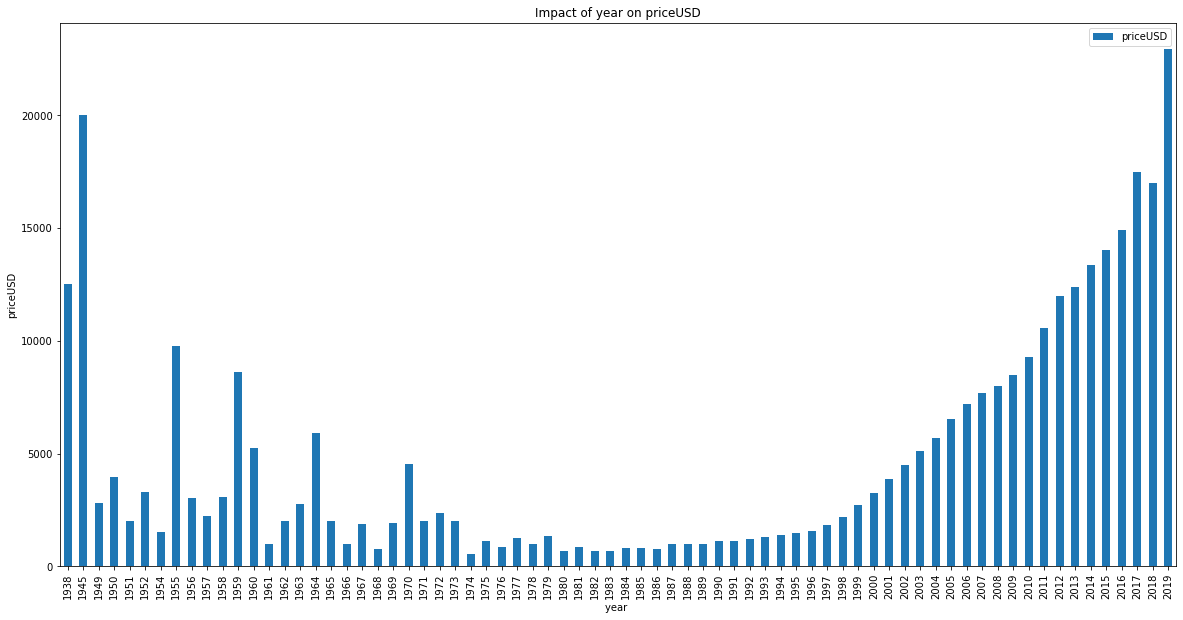

In [37]:
### plotting bar graph between year and priceUSD
df.pivot_table(index='year', values="priceUSD", aggfunc=np.median).plot(kind='bar',figsize=(20,10))
plt.xlabel("year ")
plt.ylabel("priceUSD")
plt.title("Impact of year on priceUSD")
plt.xticks(rotation=90)
plt.show()

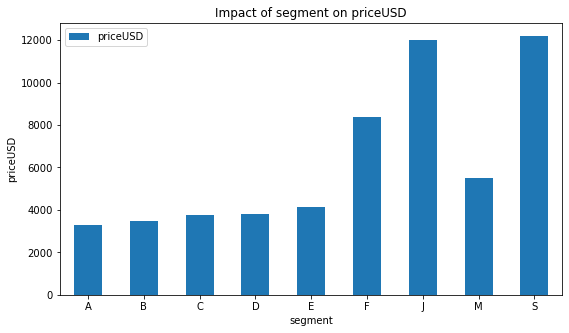

In [38]:
### plotting bar graph between segment and priceUSD
df.pivot_table(index='segment', values="priceUSD", aggfunc=np.median).plot(kind='bar',figsize=(9,5))
plt.xlabel("segment")
plt.ylabel("priceUSD")
plt.title("Impact of segment on priceUSD")
plt.xticks(rotation=0)
plt.show()

## This scatter plot show the variation of mileage(Kilomenters) vs priceUSD vs year

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1,

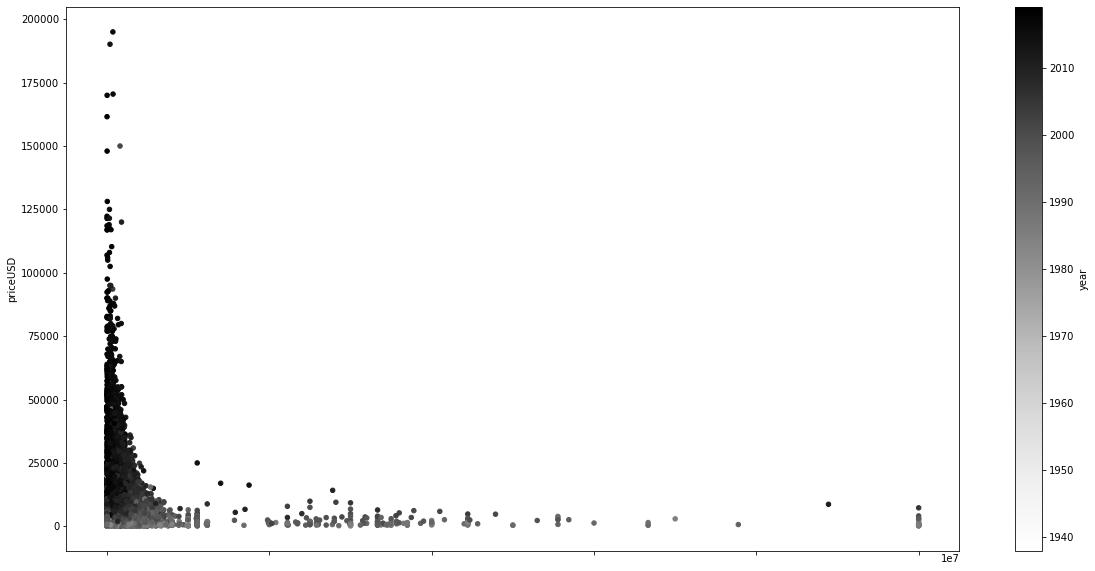

In [39]:
#This scatter plot show the variation of mileage(Kilomenters) vs priceUSD vs year using scatter plot
df.plot.scatter(x = 'mileage(kilometers)', y = 'priceUSD', c = 'year',figsize = (20,10))
plt.show()

#### This shows the variation of model vs priceUSD using bar plot

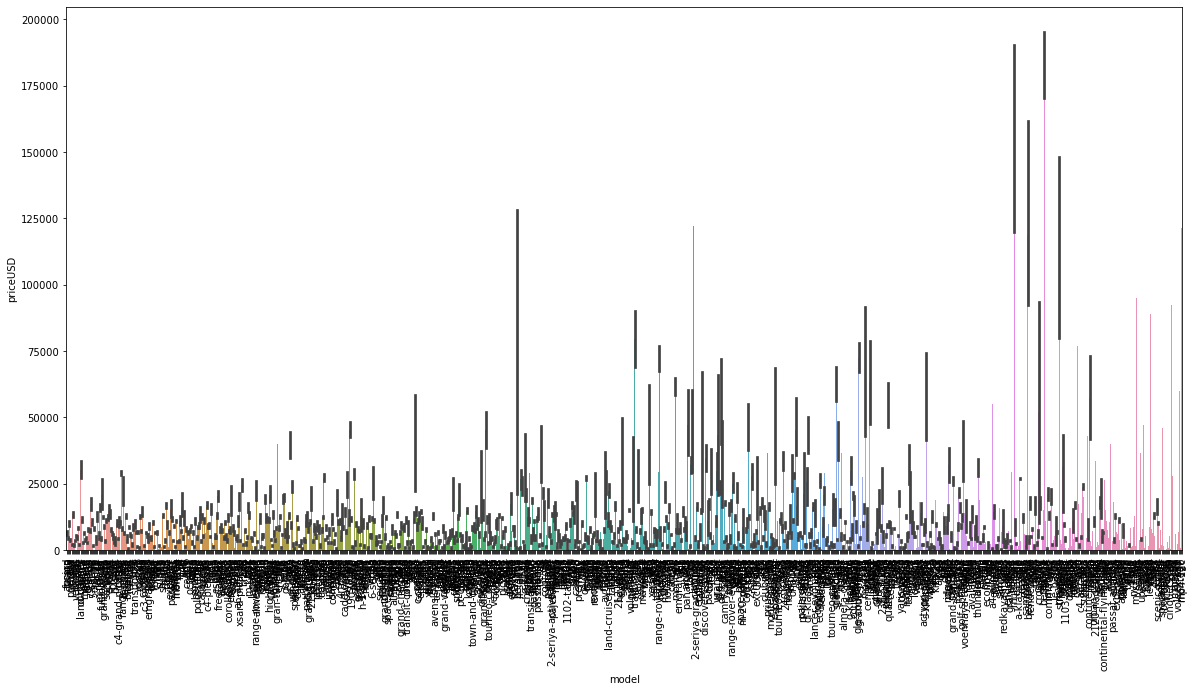

In [40]:
#This shows the variation of model vs priceUSD using bar plot
plt.figure(figsize = (20,10))
sns.barplot(x = df['model'],y = df['priceUSD'])
plt.xticks(rotation=90)
plt.show()

#### A simple joint plot to visualize item MRP and outlet sales


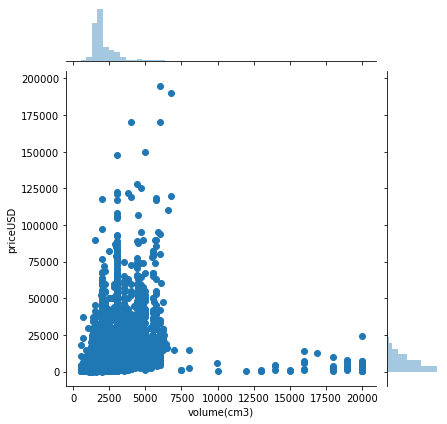

In [41]:
# A simple joint plot to visualize item MRP and outlet sales
sns.jointplot(x = df['volume(cm3)'],y = df['priceUSD'])

### Impact of condition on priceUSD

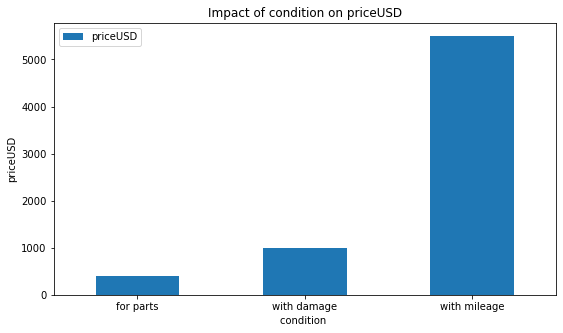

In [42]:
df.pivot_table(index='condition', values="priceUSD", aggfunc=np.median).plot(kind='bar',figsize=(9,5))
plt.xlabel("condition ")
plt.ylabel("priceUSD")
plt.title("Impact of condition on priceUSD")
plt.xticks(rotation=0)
plt.show()

### Plotting drive_unit v/s priceUSD

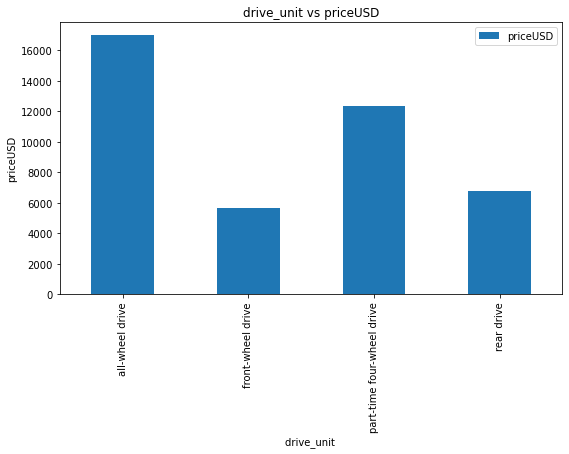

In [43]:
pivoTable = \
df.pivot_table(index='drive_unit', values="priceUSD", aggfunc=np.mean)

pivoTable.plot(kind='bar',figsize=(9,5))
plt.xlabel("drive_unit ")
plt.ylabel("priceUSD")
plt.title("drive_unit vs priceUSD")
plt.xticks(rotation=90)
plt.show()

### Plotting transmission v/s priceUSD

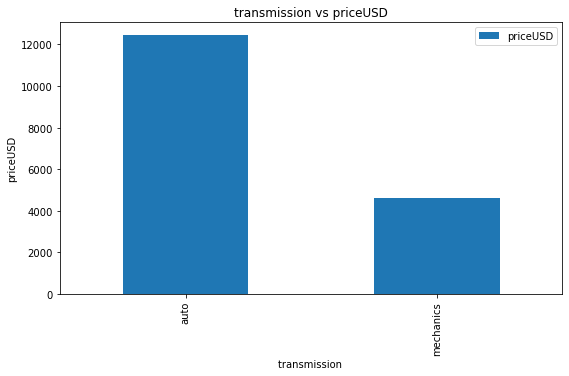

In [44]:
pivoTable = \
df.pivot_table(index='transmission', values="priceUSD", aggfunc=np.mean)

pivoTable.plot(kind='bar',figsize=(9,5))
plt.xlabel("transmission ")
plt.ylabel("priceUSD")
plt.title("transmission vs priceUSD")
plt.xticks(rotation=90)
plt.show()

### Plotting fuel_type v/s priceUSD

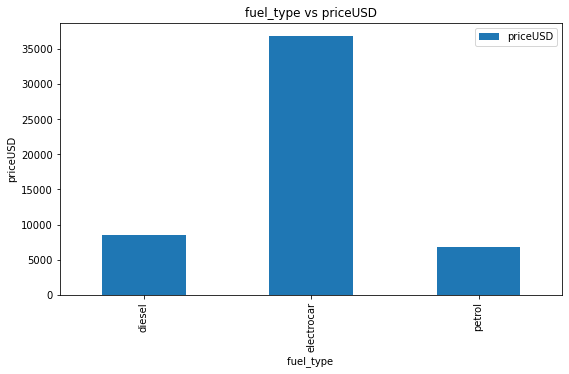

In [45]:
pivoTable = \
df.pivot_table(index='fuel_type', values="priceUSD", aggfunc=np.mean)

pivoTable.plot(kind='bar',figsize=(9,5))
plt.xlabel("fuel_type ")
plt.ylabel("priceUSD")
plt.title("fuel_type vs priceUSD")
plt.xticks(rotation=90)
plt.show()

### Pairplot of dataset

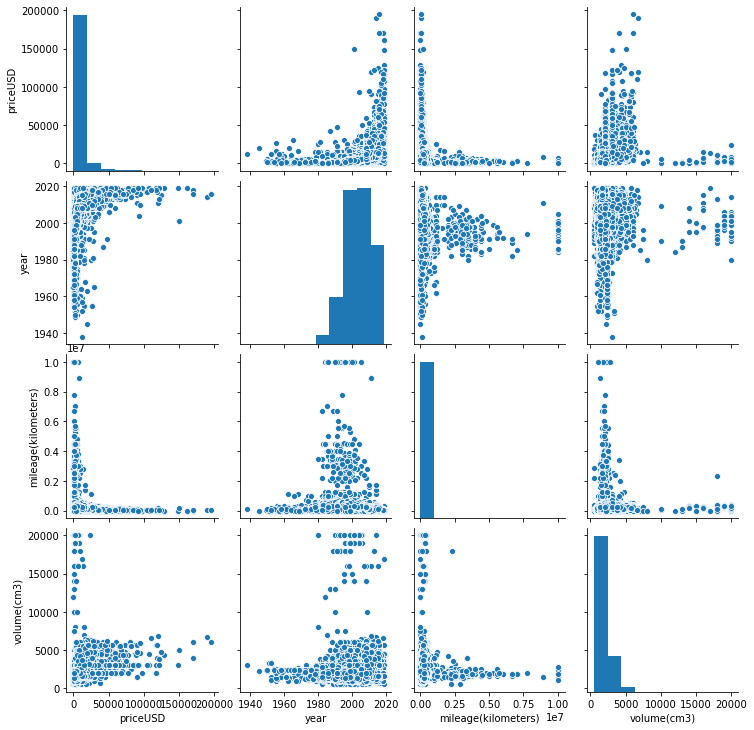

In [46]:
sns.pairplot(data = df)